In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

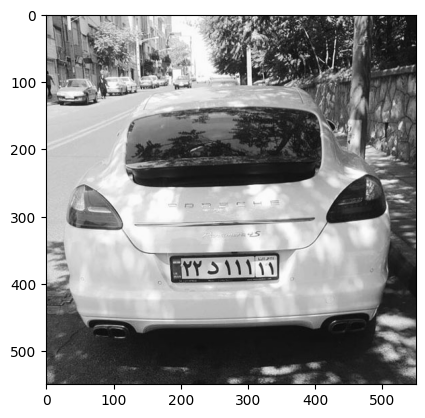

In [44]:
car_img = cv2.imread('C:/Users/USER/Downloads/carpic1.jpg')
car_img_gray = cv2.cvtColor(car_img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(car_img_gray, cv2.COLOR_BGR2RGB))

In [45]:
bilateral_filter = cv2.bilateralFilter(car_img_gray, 11, 15, 15)
edges = cv2.Canny(bilateral_filter, 30, 200)

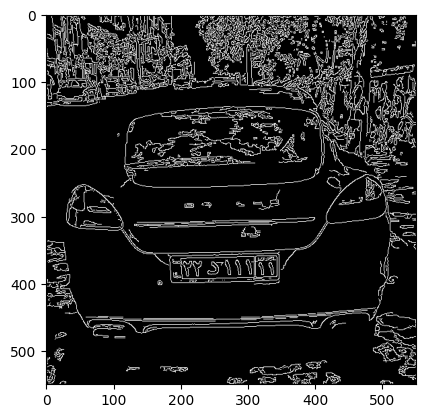

In [46]:
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [47]:
contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_refined = imutils.grab_contours(contours)
sorted_contours = sorted(contours_refined, key=cv2.contourArea, reverse=True)[:4]

In [48]:
for contour in sorted_contours:
    contour_approx = cv2.approxPolyDP(contour, 10, True)
    if len(contour_approx) == 4:
        plate_location = contour_approx
        break

In [49]:
plate_location

array([[[346, 353]],

       [[181, 357]],

       [[185, 395]],

       [[343, 395]]], dtype=int32)

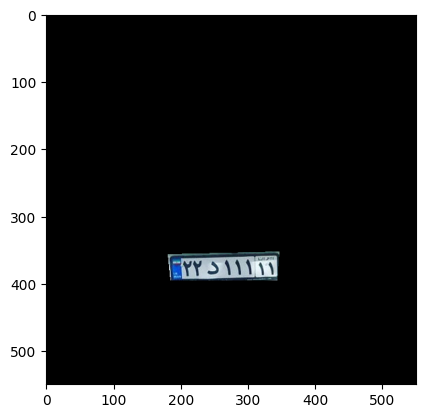

In [50]:
plate_mask0 = np.zeros(car_img_gray.shape, np.uint8)
plate_mask = cv2.drawContours(plate_mask0, [plate_location], 0, 255, -1)
plate_img = cv2.bitwise_and(car_img, car_img, mask=plate_mask)
plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))